#  Exercise 1: Linear regression with multiple variables

In [137]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load and explore data:

In [138]:
data = pandas.read_csv('ex1data2.txt', header=None, names=['x1', 'x2', 'y'])

In [139]:
data.head()

,x1,x2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [140]:
data.shape

(47, 3)

In [141]:
X = data[['x1', 'x2']].values
Y = data['y'].values
m = len(data)

## Part 1: Feature Normalization 

In [142]:
def feature_normalize(X):
    #   FEATURENORMALIZE Normalizes the features in X 
    #   FEATURENORMALIZE(X) returns a normalized version of X where
    #   the mean value of each feature is 0 and the standard deviation
    #   is 1. This is often a good preprocessing step to do when
    #   working with learning algorithms.

    # You need to set these values correctly
    X_norm = X
    mu     = np.zeros(X.shape[1])
    sigma  = np.zeros(X.shape[1])
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: First, for each feature dimension, compute the mean
    #               of the feature and subtract it from the dataset,
    #               storing the mean value in mu. Next, compute the 
    #               standard deviation of each feature and divide
    #               each feature by it's standard deviation, storing
    #               the standard deviation in sigma. 
    #
    #               Note that X is a matrix where each column is a 
    #               feature and each row is an example. You need 
    #               to perform the normalization separately for 
    #               each feature. 
    #
    # Hint: You might find the 'np.mean' and 'np.std' functions useful.
    #  
    mu = np.mean(X)
    sigma = np.std(X)
    X_norm = (X - mu) / sigma
    
    
    
    # ============================================================
    
    return X_norm, mu, sigma

Scale features and set them to zero mean:

In [143]:
X_norm, mu, sigma = feature_normalize(X)

Add intercept term to X:

In [144]:
X_norm = np.insert(X_norm, 0, 1, 1)
X_norm[:2]

array([[ 1.        ,  0.96415008, -0.87391021],
       [ 1.        ,  0.52322557, -0.87391021]])

In [145]:
# choose some alpha value
alpha = 0.01
# Init Theta
theta = np.zeros(3)

iterations = 400

## Part 2: Gradient Descent 

Make sure your implementations of compute_cost and gradient_descent work when X has more than 2 columns!

In [146]:
def compute_cost_multi(X, y, theta):
    # COMPUTECOSTMULTI Compute cost for linear regression
    # J = COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the
    # parameter for linear regression to fit the data points in X and y
    
    # some useful values
    m = len(X)
    
    # You need to return this value correctly:
    J = 0
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.
    y_hat = theta.dot(X.T)
    J = (1/(2*m)) * (y_hat - y).T.dot(y_hat - y)
    
    
    # ============================================================
    return J

Cost at initial theta:

In [147]:
compute_cost_multi(X_norm, Y, theta)

65591548106.457443

In [152]:
def gradient_descent_multi(X, y, theta, alpha, num_iters):
    # GRADIENTDESCENT Performs gradient descent to learn theta
    # theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    # taking num_iters gradient steps with learning rate alpha
    
    # Initialize
    J_history = np.zeros(num_iters)
    T_history = np.zeros((num_iters,X.shape[1]))
    
    for i in range(num_iters):
        T_history[i] = theta

        ### ========= YOUR CODE HERE ============
        # Instructions: Perform a single gradient step on the parameter vector theta.
        # θ := θ −mXT(Xθ − y)
        y_hat = theta.dot(X.T)        
        y_hat_minus_y = (y_hat - y)
        delta = X.T.dot(y_hat_minus_y)
        theta = theta - (alpha/m) * X.T.dot(y_hat_minus_y).T
        ### =====================================
        
        J_history[i] = compute_cost_multi(X, y, theta)
    return theta, J_history, T_history

Run gradient descent:

In [153]:
theta, J_history, T_history = gradient_descent_multi(X_norm, Y, theta, alpha, iterations)

ValueError: shapes (3,) and (47,3) not aligned: 3 (dim 0) != 47 (dim 0)

The theta values found by gradient descent should be [ 340412.65957447,  109447.79646964,   -6578.35485416]).

In [150]:
theta

array([ 119999.41363909,  148539.68555667, -104839.19814394])

Convergence graph:

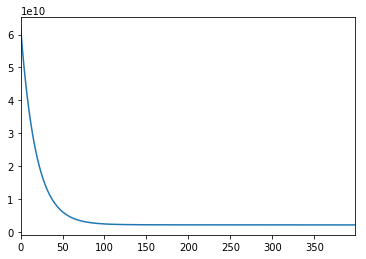

In [151]:
pandas.Series(J_history).plot()

Estimate the price of a 1650 sqft, 3 bedroom house:

In [289]:
# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================
# Recall that the first column of X is all-ones. Thus, it does
# not need to be normalized.

price = 0

# ============================================================

price

0

## Part 3: Normal Equations 
The following code computes the closed form 
solution for linear regression using the normal
equations. You should complete the code in 
normal_eqn().

After doing so, you should complete this code 
to predict the price of a 1650 sq-ft, 3 br house.


In [ ]:
data = pandas.read_csv('ex1data2.txt', header=None, names=['x1', 'x2', 'y'])
X = data[['x1', 'x2']].values
Y = data['y'].values
X = np.insert(X, 0, 1, 1)

In [ ]:
def normal_eqn(X, y):
    #NORMALEQN Computes the closed-form solution to linear regression 
    #   NORMALEQN(X,y) computes the closed-form solution to linear 
    #   regression using the normal equations.

    theta = np.zeros(X.shape[1]);

    # ====================== YOUR CODE HERE ======================
    # Instructions: Complete the code to compute the closed form solution
    #               to linear regression and put the result in theta.
    #



    # ============================================================
    return theta

In [ ]:
theta = normal_eqn(X, Y)

Theta found using the normal equations:

In [ ]:
theta

Price estimation of a 1650sqft house with 3 bedrooms, using theta from the normal equations:

In [ ]:
# ====================== YOUR CODE HERE ======================
0
# ============================================================